# Integrantes del grupo: 
Wenya Zhong; Ana Gil  


# Práctica 3 - Métodos Runge-Kutta

Construir un procedimiento **DESOLVE_RK** que calcule una solución numérica para una ecuación diferencial de la forma
$$\frac{dy}{dx} = f(x,y) \qquad \text{ con c.i.} \quad y(x_0)=y_0$$
sobre un intervalo $[a,b]$, tal que $x_0 \in [a,b]$,  utilizando un método de pares encajados basado en una de las siguientes parejas de métodos: Runge – Kutta – Fehlberg o DOPRI  estudiados en el tema 3.


## DESOLVE_RK: USO

### Puntuación: Pseudocódigo + Algoritmo : 6 puntos

### <span style='color:magenta '> Secuencia de llamada:  </span>  

    DESOLVE_RK( pvi, rng ) 

**Parámetros:**
   
     pvi =  [f, ci]  donde f es la función que define el PVI={y'=f(x,y), y(x0)=y0} y ci es 
                la condición inicial [x0,y0] 
     rng   =  [a,b] un intervalo conteniendo el valor inicial x0 de la variable independiente 
                
**Descripción:**


El procedimiento DESOLVE_RK usa el método de pares de encajados combinando dos métodos de Runge Kutta dados para estimar el error y elegir el tamaño de paso óptimo y proporciona como salida una solución numérica del _PVI_ en _rng_  obtenida a patir del método que se especifique,  por defecto el RKF45. 


### **Recursividad:**
El procedimiento **obligatoriamente** se programará de forma recursiva. Los cálculos principales solo se realizan cuando $x0 = a$. Si la ci, $x0 \neq a$, ya sea porque $x0 =b$ o bien $a<x0<b$, la función principal debe llamarse a sí misma, modificando el rng de forma adecuada en la llamada recursiva, y el tamaño de paso h dentro de la función, para que nos dé la solución.

### <span style='color:magenta '> Opciones:</span>  


<span style='color:blue '> **hini=h**  </span>  

El tamaño de paso para el primer intento de paso. Por defecto es "hini =$10^{-4}$".

<span style='color:blue '> **hmax=h**  </span> 

El tamaño máximo de paso. Por defecto es "hmax=orden*0.05".

<span style='color:blue '> **hmin=h**  </span>  

El tamaño mínimo de paso. Por defecto es "hmin=min(0.5*orden, $\frac{hini}{2000}$ )".

Nota: hini debe estar comprendido entre hmin y hmax.

<span style='color:blue '> **maxsteps=n**  </span>  

El numero máximo de pasos a utilizar. Se produce un mensaje de error si el número máximo de pasos se alcanza antes de alcanzar el final del intervalo sobre el que queremos calcular la solución. Por defecto es _"maxsteps=2000"_.

<span style='color:blue '> **tolerancia=n**  </span>  

El tamaño del paso se elige adaptativamente intentando asegurar que el error local para cada paso no sea
mayor que $10^{-n}$.
Por defecto es _"tolerancia=4"_.


<span style='color:blue '> **metodo=RKF45, DOPRI54**  </span>  

La pareja de métodos RK a utilizar en el algoritmo de pares encajados para estimar la solución.

Con la opción _metodo=RKF45_ se usa la pareja Runge – Kutta – Fehlberg, con el método de orden 5 para estimar el error del método de orden 4, y la salida será el valor calculado por el método de orden 4.
 
Con la opción _metodo=DOPRI54_ se usa la pareja Dormand-Prince que utiliza el método de orden 5 para estimar el error del método de orden 4, y la salida será el valor calculado por el método de orden 5.


La opción por defecto es _"metodo=RKF45"_.

<span style='color:blue '> **info=0, 1, 2, 3 , 4, G** </span>  

Con la opción _"info=0"_ no se imprime nada en pantalla durante el cómputo de la solución númerica.

Con la opción _"info=1"_ se imprimen la fórmula del método que se utiliza para el cálculo de la solución, y el número total de pasos.

Con la opción _"info=2"_ se imprime el metodo y la información de los pasos que forman la solución numérica, según se van calculando (h,error, x, y, q) cuando se alcanzan la tolerancia, y el número total de pasos.

Con la opción "_info=3_" se imprime la información de los casos anteriores, y los valores (h,error, q) de los pasos intermedios.

Con la opción _"info=4"_ la única impresión en pantalla será el número total de pasos usados para el caso de paso variable.


Con la opción _"info=G"_ se mostrará en pantalla la representación gráfica de la solución numérica. 


**<span style='color:Red '> Opcional:</span> (2 punto)**

Introducir una nueva variable, _fsal_, que se utilizará **únicamente** con la opción _metodo=DOPRI54_. Cuando _fsal = SI_ el método DOPRI54 deberá utilizar la propiedad _First Same As Last_. Por defecto, _fsal = SI_. 

**Nota**: La propiedad FSAL en el método DOPRI54 consiste en que $k_{1}^{n+1}=k_7^n$, pero para que esto se cumpla el tamaño de paso $h$ de los pasos $n$ y $n+1$ debe de ser el mismo. Es por esto que con la opción _fsal = SI_ nunca aumentaremos el tamaño de paso, solo lo reduciremos en los casos que haga falta para que se cumpla la tolerancia. Para minimizar el número de evaluaciones de función, cuando _fsal = SI_ estableceremos _hini = hmax_.



## DESOLVE_RK: IMPLEMENTACIÓN

### Coeficientes de los métodos.

In [2]:
def RKF(f, x, y, z):
    k1 = z * f(x, y)
    k2 = z * f(x + (1 / 4) * z, y + (1 / 4) * k1)
    k3 = z * f(x + (3 / 8) * z, y + (3 / 32) * k1 + (9 / 32) * k2)
    k4 = z * f(x + (12 / 13) * z, y + (1932 / 2197) * k1 - (7200 / 2197) * k2 + (7296 / 2197) * k3)
    k5 = z * f(x + z, y + (439 / 216) * k1 - 8 * k2 + (3680 / 513) * k3 - (845 / 4104) * k4)
    k6 = z * f(x + (1 / 2) * z, y - (8 / 27) * k1 + 2 * k2 - (3544 / 2565) * k3 + (1859 / 4104) * k4 - (11 / 40) * k5)
    est_error = (1 / 360) * k1 - (128 / 4275) * k3 - (2197 / 75240) * k4 + (1 / 50) * k5 + (2 / 55) * k6
    return [est_error, [k1, k2, k3, k4, k5, k6]]


def DOPRI(f, x, y, z, **kwargs):
    fsal = kwargs.get('fsal')
    opc = [k for k in kwargs]
    if not 'fsal' in opc: fsal = 'no'
    if fsal == 'no':
        k1 = z * f(x, y)
    else:
        k1 = fsal
    k2 = z * f(x + (1 / 5) * z, y + (1 / 5) * k1)
    k3 = z * f(x + (3 / 10) * z, y + (3 / 40) * k1 + (9 / 40) * k2)
    k4 = z * f(x + (4 / 5) * z, y + (44 / 45) * k1 - (56 / 15) * k2 + (32 / 9) * k3)
    k5 = z * f(x + (8 / 9) * z, y + (19372 / 6561) * k1 - (25360 / 2187) * k2 + (64448 / 6561) * k3 - (212 / 729) * k4)
    k6 = z * f(x + z,
               y + (9017 / 3168) * k1 - (355 / 33) * k2 + (46732 / 5247) * k3 + (49 / 176) * k4 - (5103 / 18656) * k5)
    k7 = z * f(x + z, y + (35 / 384) * k1 + (500 / 1113) * k3 + (125 / 192) * k4 - (2187 / 6784) * k5 + (11 / 84) * k6)
    est_error = (71 / 57600) * k1 - (71 / 16695) * k3 + (71 / 1920) * k4 - (17253 / 339200) * k5 + (22 / 525) * k6 - (
                1 / 40) * k7
    return [est_error, [k1, k2, k3, k4, k5, k6, k7]]

El siguiente bloque no compila por si mismo,  pero lo necesitareis incorporar en vuestro programa, aquí teneis 

    i) las formulas para el cálculo del error y el cambiador del paso.

    ii) los valores de los $b_i's$ de los distintos métodos.

In [3]:
        
# Para el calculo del error y el q 
# n representa el orden del método para el que se estima del error

EF = M(f, X[k], Y[k], h)
err_est = abs(EF[0] / h)
q = (eps / (2 * err_est)) ** (1 / n)  


#Coeficientes del método: 
#orden representa el orden del método que se usa para aproximar solución
#n representa el orden del método para el que se optimiza el tamaño del paso

if metodo == 'RKF45':
    B = [Fraction(25, 216), 0, Fraction(1408, 2565), Fraction(2197, 4104),
         Fraction(-1, 5), 0];
    M = RKF;
    orden = 4; n=4;
elif metodo == 'DOPRI54':
    B = [Fraction(35, 384), 0, Fraction(500, 1113), Fraction(125, 192),
        Fraction(-2187, 6784), Fraction(11, 84), 0];
    M = DOPRI;
    orden = 5; n=4;

NameError: name 'M' is not defined

## Impresion del método.
Para la impresión del método en pantalla, definimos la siguiente función, que dentro del código podemos llamar pasándole  los coeficientes del método, y hacemos un display de la salida como se muestra en el ejemplo:

In [4]:
from fractions import Fraction
import sympy as sp
sp.init_printing(use_latex='mathjax')

def expresion(B):
    k1, k2, k3, k4, k5, k6, k7, yn, y1 = sp.symbols('k1 k2 k3 k4 k5 k6 k7 y_{n} y_{n+1}')
    C = [k1, k2, k3, k4, k5, k6, k7]
    E = yn
    for i in range(len(B)):
        E += B[i] * C[i]
    return sp.Eq(y1, E)


B = [Fraction(35, 384), 0, Fraction(500, 1113), Fraction(125, 192),
        Fraction(-2187, 6784), Fraction(11, 84), 0];
print('La solución numérica se calcula como:\n')
display(expresion(B))

La solución numérica se calcula como:



          35⋅k₁   500⋅k₃   125⋅k₄   2187⋅k₅   11⋅k₆        
y_{n+1} = ───── + ────── + ────── - ─────── + ───── + y_{n}
           384     1113     192       6784      84         

## Pseudocódigo del algotimo


>    Input: [f,ci], [a,b], opciones
>
>        Lectura de datos
>        Lectura, comprobación y valores por defecto de las opciones
>
>        Coeficientes y orden dependiendo del método M
>
>        si x0 == a:
>            S1 = [[x0,y0]]
>            h = hini (hmax si fsal="si")
>            i = 0
>
>            while S1[i][0] < b:
>                si i >= maxsteps entonces ERROR
>                
>                EF = M(f, S[i][0], S[i][1], h) (usando k7 del paso anterior si fsal="si")
>                err_est = abs(EF[0] / h)
>
>                while err_est >= eps:
>
>                    q = (eps / (2 * err_est)) ** (1 / n)
>                    si q <= 0.1:
>                        q = 0.1
>                    si q >= 4:
>                        q = 4
>
>                    si hmin > q*h:
>                        ERROR
>                    si hmax < q*h:
>                        h = hmax
>                    si no:
>                        h = q*h
>                
>                    EF = M(f, S[i][0], S[i][1], h)
>                    err_est = abs(EF[0] / h)
>
>                phi = 0
>                for j = 0,..., len(B)-1:
>                    phi += B[j]*EF[1][j]
>                S.append([S[i][0]+h,S[i][1]+phi])
>
>                Actualizar q y h igual que antes (solo si no estamos usando fsal)
>
>                i += 1
>
>            Tomar h = b - S[i-1][0] y dar el último paso
>            contador = i
>
>        si x0 == b:
>            S = DESOLVE_RK(pvi,[b,a],hini=-hini,hmax=-hmax,hmin=-hmin) y darle la vuelta
>
>        si a < x0 < b:
>            S1 = DESOLVE_RK(pvi,[x0,b],hini=hini,hmax=hmax,hmin=hmin)
>            S2 = DESOLVE_RK(pvi,[x0,a],hini=-hini,hmax=-hmax,hmin=-hmin,maxsteps=maxsteps-S1[1])
>            S = concatenar(S2 (dado la vuelta), S1)
>            contador = contador de S1 + contador de S2
>
>    Output: S

## Programación del algoritmo


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import sys

def DESOLVE_RK(pvi, rng, **kwargs):
    '''Función que usa un método de pares encajados basado en una de las siguientes parejas de métodos:
    Runge – Kutta – Fehlberg o DOPRI, para hallar una solución numérica en rng del PVI.
    
    Parámetros a introducir:
     pvi = [f, ci] = donde f es la función que define el PVI={y'=f(x,y), y(x0)=y0} y ci es la condición inicial [x0,y0] 
     rng = [a,b] un intervalo conteniendo el valor inicial x0 de la variable independiente'''
    
    # Lectura de datos
    f = pvi[0]; ci = pvi[1]
    a = rng[0]; b = rng[1]
    x0 = ci[0]; y0 = ci[1]
    
    # Lectura de opciones
    hini=kwargs.get("hini")
    hmax=kwargs.get("hmax")
    hmin=kwargs.get("hmin")
    maxsteps=kwargs.get("maxsteps")
    tolerancia=kwargs.get("tolerancia")
    metodo=kwargs.get("metodo")
    info=kwargs.get("info")
    recurs=kwargs.get("recurs")
        
    # Asignación de valores por defecto
    opc=[k for k in kwargs]
    
    if not "hini" in opc:
        hini=10**(-4)
    if not "maxsteps" in opc:
        maxsteps=2000
    if not "tolerancia" in opc:
        tolerancia=4
    if not "metodo" in opc:
        metodo="RKF45"
    if not "info" in opc:
        info=0
    if not "recurs" in opc:
        recurs="no"
        
    # Comprobaciones
    if type(hini)!=int and type(hini)!=float:
        sys.exit('Error: el hini introducido "{0}" no es un número.'.format(hini))
        
    if type(maxsteps) != int or maxsteps <= 0:
        sys.exit('Error: el número máximo de pasos introducido "{0}" no es un entero positivo.'.format(maxsteps))
        
    if type(tolerancia) != int or tolerancia <= 0:
        sys.exit('Error: la potencia para la tolerancia introducida "{0}" no es un entero positivo.'.format(tolerancia))
    
    if metodo not in ["RKF45","DOPRI54"]:
        sys.exit('Error: el metodo introducido "{0}" no es "RKF45" ni "DOPRI54".'.format(metodo))
        
    if info not in [0,1,2,3,4,"G"]:
        sys.exit('Error: el valor de info introducido "{0}" no es "0", "1", "2", "3", "4" ni "G".'.format(info))
    
    # Coeficientes y orden del método
    if metodo == 'RKF45':
        B = [Fraction(25, 216), 0, Fraction(1408, 2565), Fraction(2197, 4104), Fraction(-1, 5), 0];
        M = RKF;
        orden = 4; n=4;
        
        opciones=["hini","hmax","hmin","maxsteps","tolerancia","metodo","info","recurs"]
                
    elif metodo == 'DOPRI54':
        B = [Fraction(35, 384), 0, Fraction(500, 1113), Fraction(125, 192), Fraction(-2187, 6784), Fraction(11, 84), 0];
        M = DOPRI;
        orden = 5; n=4;
        
        # Opción fsal
        fsal=kwargs.get("fsal")
        
        if not "fsal" in kwargs:
            fsal="si"
            
        if fsal not in ["si","no"]:
            sys.exit('Error: el valor de fsal introducido "{0}" no es "si" ni "no".'.format(fsal))
            
        opciones=["hini","hmax","hmin","maxsteps","tolerancia","metodo","info","recurs","fsal"]
            
    # Comprobación sobre las opciones introducidas
    opc_extra=[i for i in opc if not i in opciones]
    if len(opc_extra)>0:
        print("Advertencia: no se tendrán en cuenta las opciones:{0}".format(opc_extra))
        
    # Asignación de valores por defecto
    if not "hmax" in opc:
        hmax=orden*0.5
    if not "hmin" in opc:
        hmin=min(0.05*orden,hini/2000)
            
    # Comprobaciones
    if type(hmax)!=int and type(hmax)!=float:
        sys.exit('Error: el hmax introducido "{0}" no es un número.'.format(hmax))
        
    if type(hmin)!=int and type(hmin)!=float:
        sys.exit('Error: el hmin introducido "{0}" no es un número.'.format(hmin))
            
    if not abs(hmin) <= abs(hini) <= abs(hmax):
        sys.exit('Error: el hini introducido "{0}" no se encuentra entre el hmin "{1}" y el hmax "{2}".'.format(hini,hmin,hmax))
    
    # Impresión del método
    if info == 1 and recurs == "no":
        print('La solución numérica se calcula como:\n')
        display(expresion(B))
        
    # Epsilon
    eps = 10**(-tolerancia)
    
    if x0 == a:
        
        # Lista para almacenar las iteraciones del método
        S = [[x0,y0]]
    
        # Método
        if info == 2 or info == 3:
            print('-----------------------------------------------------------------------------')
            print('Información de los pasos de la solución numérica con TOL =',eps,":")
            print( 'Paso      h             Error            x               y              q')
            print('-----------------------------------------------------------------------------')
          
        if metodo == 'DOPRI54' and fsal == "si":
            hini = hmax
        
        h = hini
        i = 0
    
        while (S[i][0] < b and a<b) or (S[i][0] > b and a>b):
            if i >= maxsteps:
                sys.exit('Error: el número máximo de pasos "{0}" se alcanza antes de alcanzar el final del intervalo.'.format(maxsteps))
            
            if metodo == 'DOPRI54' and fsal == "si" and i > 0:
                EF = M(f, S[i][0], S[i][1], h, fsal = k7)
            else:
                EF = M(f, S[i][0], S[i][1], h)
            
            err_est = abs(EF[0] / h)
            
            while err_est >= eps:
                if err_est == 0:
                    q = 4
                else:  
                    q = (eps / (2 * err_est)) ** (1 / n)
                    if q <= 0.1:
                        q = 0.1
                    elif q >= 4:
                        q = 4
                        
                if info == 3:    
                    print('---   ','%.5f    %3.10e' %(h,err_est),'  --------   ','----------------    ''%.5f' %(q))
                    
                if abs(hmin) > abs(q*h):
                    sys.exit('Error: Se requiere un tamaño de paso menor que hmin para alcanzar la tolerancia')
                elif err_est == 0 or abs(hmax) < abs(q*h):
                    h = hmax
                else:
                    h = q*h
                
                EF = M(f, S[i][0], S[i][1], h)
                err_est = abs(EF[0] / h)
            
            if metodo == "DOPRI54" and fsal == "si":
                k7 = EF[1][6]
        
            phi = 0
            for j in range(len(B)-1):
                phi += B[j]*EF[1][j]
            S.append([S[i][0]+h,S[i][1]+phi])
        
            if metodo == "DOPRI54" and fsal == "si":
                if (info == 2 or info == 3) and ((S[i+1][0] < b and a<b) or (S[i+1][0] > b and a>b)):
                    print (i+1,'     %.5f    %3.10e    %.5f    %3.10e   ' %(h,err_est,S[i+1][0],S[i+1][1]),'--------')
                    
            else:
                if err_est == 0:
                    q = 4
                else:  
                    q = (eps / (2 * err_est)) ** (1 / n)
                    if q <= 0.1:
                        q = 0.1
                    elif q >= 4:
                        q = 4
                    
                if (info == 2 or info == 3) and ((S[i+1][0] < b and a<b) or (S[i+1][0] > b and a>b)):
                    print (i+1,'     %.5f    %3.10e    %.5f    %3.10e    %.5f' %(h,err_est,S[i+1][0],S[i+1][1],q))
                    
                if abs(hmin) > abs(q*h):
                    sys.exit('Error: Se requiere un tamaño de paso menor que hmin para alcanzar la tolerancia')
                elif err_est == 0 or abs(hmax) < abs(q*h):
                    h = hmax
                else:
                    h = q*h
            
            i += 1
        
        # Ajustamos el tamaño de paso para que acabe justamente en b
        h = b - S[i-1][0]
        EF = M(f, S[i-1][0], S[i-1][1], h)
        
        phi = 0
        for j in range(len(B)-1):
            phi += B[j]*EF[1][j]
        S[i] = [S[i-1][0]+h,S[i-1][1]+phi]
        
        if info == 2 or info == 3:
            if metodo == 'DOPRI54' and fsal == "si":
                print (i,'     %.5f    %3.10e    %.5f    %3.10e   ' %(h,err_est,S[i][0],S[i][1]),'--------')
            else:
                print (i,'     %.5f    %3.10e    %.5f    %3.10e    %.5f' %(h,err_est,S[i][0],S[i][1],q))
            print('-----------------------------------------------------------------------------')
            print()
        
        # Convertimos a array
        S = np.array(S,dtype=float)
    
        # Contador de pasos
        contador = i
    
    elif x0 == b:
        if metodo == 'RKF45':
            S1 = DESOLVE_RK(pvi,[b,a],hini=-hini,hmax=-hmax,hmin=-hmin,maxsteps=maxsteps,tolerancia=tolerancia,metodo=metodo,info=info,recurs="si")
        elif metodo == 'DOPRI54':
            S1 = DESOLVE_RK(pvi,[b,a],hini=-hini,hmax=-hmax,hmin=-hmin,maxsteps=maxsteps,tolerancia=tolerancia,metodo=metodo,info=info,recurs="si",fsal=fsal)
        S = S1[0][::-1]
        contador = S1[1]
    else:
        if metodo == 'RKF45':
            S1 = DESOLVE_RK(pvi,[x0,b],hini=hini,hmax=hmax,hmin=hmin,maxsteps=maxsteps,tolerancia=tolerancia,metodo=metodo,info=info,recurs="si")
            S2 = DESOLVE_RK(pvi,[x0,a],hini=-hini,hmax=-hmax,hmin=-hmin,maxsteps=maxsteps-S1[1],tolerancia=tolerancia,metodo=metodo,info=info,recurs="si")
        elif metodo == 'DOPRI54':
            S1 = DESOLVE_RK(pvi,[x0,b],hini=hini,hmax=hmax,hmin=hmin,maxsteps=maxsteps,tolerancia=tolerancia,metodo=metodo,info=info,recurs="si",fsal=fsal)
            S2 = DESOLVE_RK(pvi,[x0,a],hini=-hini,hmax=-hmax,hmin=-hmin,maxsteps=maxsteps-S1[1],tolerancia=tolerancia,metodo=metodo,info=info,recurs="si",fsal=fsal)
        S = np.concatenate((S2[0][1:][::-1],S1[0]))
        contador = S1[1] + S2[1]
        
    if info in [1,2,3,4] and recurs == "no":
        print("Número total de pasos:",contador,"\n")
        
    if info == "G" and recurs == "no":
        plt.figure(figsize=(15,6))
        plt.plot(S[:,0],S[:,1],'r')
        if metodo == "RKF45":
            plt.title("Solución numérica RKF45")
        elif metodo == "DOPRI54":
            plt.title("Solución numérica DOPRI54")
        plt.xlabel("x")
        plt.ylabel("y")
    
    if recurs == "si":
        return S, contador
    
    else:
        return S

## Comprobaciones

In [31]:
# Ejemplo RKF45

def f(x,y):
    return 1+y**2

pvi = [f,(0,0)]
rng = [0,1.4]

S = DESOLVE_RK(pvi,rng,metodo='RKF45',tolerancia=4,info=3,hini=0.01)

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.0001 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
1      0.01000    3.2034704750e-12    0.01000    1.0000333347e-02    4.00000
2      0.04000    8.1415881524e-10    0.05000    5.0041708344e-02    4.00000
3      0.16000    1.8502161193e-07    0.21000    2.1314243514e-01    4.00000
---    0.64000    1.8749258156e-04   --------    ----------------    0.71862
4      0.45991    1.6420918947e-05    0.66991    7.9219746949e-01    1.32097
---    0.60753    3.4952229548e-03   --------    ----------------    0.34584
5      0.21011    1.3646732561e-05    0.88002    1.2098551121e+00    1.38352
---    0.29069    7.0492585971e-04   --------    ----------------    0.51607
6      0.15002    3.4040367615e-05    1.03004    1.6656029897e+00    1.10089
---    0.

In [148]:
# Opción metodo

DESOLVE_RK(pvi,rng,metodo="RKF45")

DESOLVE_RK(pvi,rng,metodo="DOPRI54")

DESOLVE_RK(pvi,rng,metodo="prueba")      # Da error

SystemExit: Error: el metodo introducido "prueba" no es "RKF45" ni "DOPRI54".

La solución numérica se calcula como:



          25⋅k₁   1408⋅k₃   2197⋅k₄   k₅        
y_{n+1} = ───── + ─────── + ─────── - ── + y_{n}
           216      2565      4104    5         

Número total de pasos: 18 

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.0001 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
1      0.00010    4.2351647363e-18    0.00010    1.0000000033e-04    4.00000
2      0.00040    4.2351647363e-18    0.00050    5.0000004167e-04    4.00000
3      0.00160    2.0879362150e-15    0.00210    2.1000030870e-03    4.00000
4      0.00640    5.3763722261e-13    0.00850    8.5002047142e-03    4.00000
5      0.02560    1.3730306243e-10    0.03410    3.4113223421e-02    4.00000
6      0.10240    3.3711659402e-08    0.13650    1.3735413114e-01    4.00000
7      0.40960    2.1972865152e-06    0.54610    6.0777458728e-01    2.18409
8      0.11439    1.6941722421e-07    0.66049    7.7691785793e-01    4.00000
9      0.24001    2.5285946906e-05    0.90050    1.2615275

SystemExit: Error: el valor de info introducido "5" no es "0", "1", "2", "3", "4" ni "G".

C:\Users\gilpe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


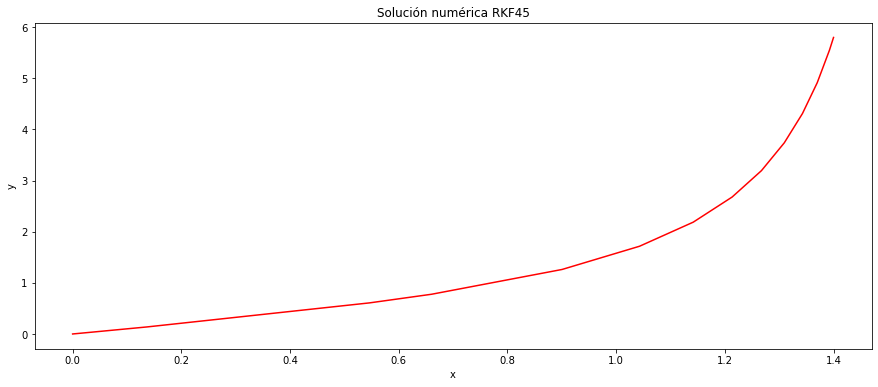

In [149]:
# Opción info

DESOLVE_RK(pvi,rng,info=0) 

DESOLVE_RK(pvi,rng,info=1) 

DESOLVE_RK(pvi,rng,info=2)

DESOLVE_RK(pvi,rng,info=3)

DESOLVE_RK(pvi,rng,info=4)

DESOLVE_RK(pvi,rng,info="G")

DESOLVE_RK(pvi,rng,info=5)     # Da error

In [150]:
# Opción hini

DESOLVE_RK(pvi,rng,hini=1) 

DESOLVE_RK(pvi,rng,hini=0.001) 

DESOLVE_RK(pvi,rng,hini="1")         # Da error

SystemExit: Error: el hini introducido "1" no es un número.

In [151]:
DESOLVE_RK(pvi,rng,hmin=0.001,hini=0.01,hmax=0.1)

DESOLVE_RK(pvi,rng,hmin=0.1,hini=0.01,hmax=0.2)         # Da error

SystemExit: Error: el hini introducido "0.01" no se encuentra entre el hmin "0.1" y el hmax "0.2".

In [152]:
# Opción hmax

DESOLVE_RK(pvi,rng,hmax=1) 

DESOLVE_RK(pvi,rng,hmax="1")         # Da error

SystemExit: Error: el hmax introducido "1" no es un número.

In [154]:
# Opción hmin

DESOLVE_RK(pvi,rng,hmin=0.0001)

DESOLVE_RK(pvi,rng,hmin="1")         # Da error

SystemExit: Error: el hmin introducido "1" no es un número.

In [155]:
# Opción maxsteps

DESOLVE_RK(pvi,rng,maxsteps=200)

DESOLVE_RK(pvi,rng,maxsteps=200.5)     # Da error

SystemExit: Error: el número máximo de pasos introducido "200.5" no es un entero positivo.

In [158]:
# Opción tolerancia

DESOLVE_RK(pvi,rng,tolerancia=2)

DESOLVE_RK(pvi,rng,tolerancia=2.5)     # Da error

SystemExit: Error: la potencia para la tolerancia introducida "2.5" no es un entero positivo.

In [20]:
# Imprimir el método con info=1

DESOLVE_RK(pvi,rng,metodo="RKF45",info=1)

DESOLVE_RK(pvi,rng,metodo="DOPRI54",info=1)

La solución numérica se calcula como:



          25⋅k₁   1408⋅k₃   2197⋅k₄   k₅        
y_{n+1} = ───── + ─────── + ─────── - ── + y_{n}
           216      2565      4104    5         

Número total de pasos: 18 

La solución numérica se calcula como:



          35⋅k₁   500⋅k₃   125⋅k₄   2187⋅k₅   11⋅k₆        
y_{n+1} = ───── + ────── + ────── - ─────── + ───── + y_{n}
           384     1113     192       6784      84         

Número total de pasos: 15 



array([[0.00000000e+00, 0.00000000e+00],
       [1.00000000e-04, 1.00000000e-04],
       [2.50100000e-01, 2.55448431e-01],
       [4.45544802e-01, 4.77572025e-01],
       [6.42525937e-01, 7.48477310e-01],
       [8.33691232e-01, 1.10156970e+00],
       [9.79822968e-01, 1.49038646e+00],
       [1.08837111e+00, 1.90949755e+00],
       [1.16988018e+00, 2.35919019e+00],
       [1.23232414e+00, 2.84075145e+00],
       [1.28115344e+00, 3.35542750e+00],
       [1.32005332e+00, 3.90420303e+00],
       [1.35155299e+00, 4.48781170e+00],
       [1.37742609e+00, 5.10679072e+00],
       [1.39894409e+00, 5.76153245e+00],
       [1.40000000e+00, 5.79786058e+00]])

In [19]:
# Opción fsal

DESOLVE_RK(pvi,rng,metodo='RKF45',fsal="si")               # Da advertencia

DESOLVE_RK(pvi,rng,metodo='DOPRI54',fsal="si")

DESOLVE_RK(pvi,rng,metodo='DOPRI54',fsal="no")

DESOLVE_RK(pvi,rng,metodo='DOPRI54',fsal="prueba")         # Da error

Advertencia: no se tendrán en cuenta las opciones:['fsal']


SystemExit: Error: el valor de fsal introducido "prueba" no es "si" ni "no".

## Ejercicio 1 (1 punto)
Dado el problema de valor inicial
$$ 
\left\lbrace
\begin{array}{rcl}
     y' &=& (1-2x)y \\
    y(0) &=& 1
\end{array}
\right.
$$
calcula aplicando los métodos RKF45 y DOPRI54 aproximaciones de la solución en el intervalo $[-2,2]$ con una tolerancia de $10^{-5}$ y $10^{-7}$.

Sabiendo que la solución exacta para el PVI es
$$y(x) = e^{x-x^2}.$$

1. Analiza el efecto de la tolerancia. Para ello, para cada método, realiza una gráfica donde se representen todas las aproximaciones con las distintas tolerancias y la solución exacta, y otra gráfica donde se representen todos los errores.

2. Analiza el efecto del método empleado. Para ello, para cada valor de la tolerancia, realiza una gráfica donde se representen todas las aproximaciones con las distintas métodos y la solución exacta, y otra gráfica donde se representen todos los errores. 

3. ¿Qué método tiene un menor coste computacional?.

Comentar **todos** los resultados.

In [36]:
def f1(x,y):
    return (1-2*x)*y

pvi = [f1,[0,1]]
rng = [-2,2]

# Método RKF45
S5R = DESOLVE_RK(pvi,rng,metodo="RKF45",tolerancia=5)
S7R = DESOLVE_RK(pvi,rng,metodo="RKF45",tolerancia=7)

# Método DOPRI54
S5D = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=5,fsal="no")
S7D = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=7,fsal="no")

# Solución exacta
def f1_sol(x):
    return np.exp(x-x**2)

SolEx5R = f1_sol(S5R[:,0])
SolEx7R = f1_sol(S7R[:,0])
SolEx5D = f1_sol(S5D[:,0])
SolEx7D = f1_sol(S7D[:,0])

# Errores
E5R = abs(S5R[:,1]-SolEx5R)
E7R = abs(S7R[:,1]-SolEx7R)
E5D = abs(S5D[:,1]-SolEx5D)
E7D = abs(S7D[:,1]-SolEx7D)

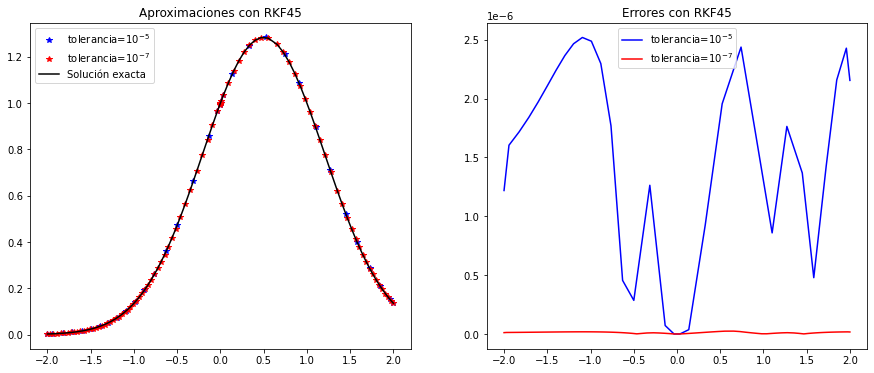

In [37]:
# Gráficas para el método RKF45

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S5R[:,0],S5R[:,1],'*b',label='tolerancia=$10^{-5}$')
plt.plot(S7R[:,0],S7R[:,1],'*r',label='tolerancia=$10^{-7}$')
plt.plot(S7R[:,0],SolEx7R,'k',label='Solución exacta')
plt.title('Aproximaciones con RKF45')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S5R[:,0],E5R,'b',label='tolerancia=$10^{-5}$')
plt.plot(S7R[:,0],E7R,'r',label='tolerancia=$10^{-7}$')
plt.title('Errores con RKF45')
plt.legend(loc='best')

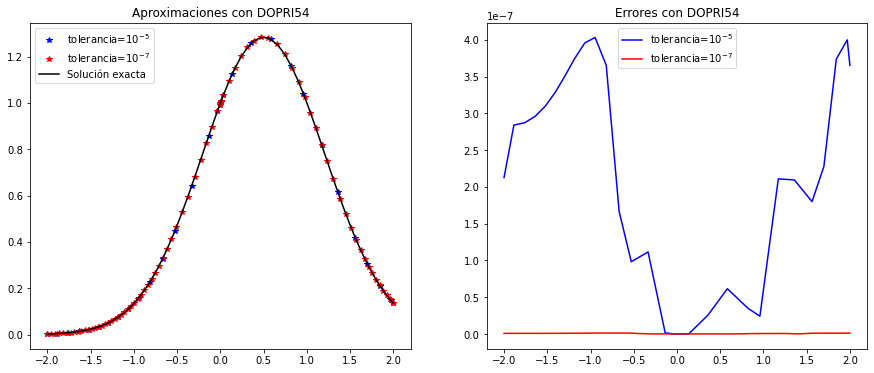

In [38]:
# Gráficas para el método DOPRI54

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S5D[:,0],S5D[:,1],'*b',label='tolerancia=$10^{-5}$')
plt.plot(S7D[:,0],S7D[:,1],'*r',label='tolerancia=$10^{-7}$')
plt.plot(S7D[:,0],SolEx7D,'k',label='Solución exacta')
plt.title('Aproximaciones con DOPRI54')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S5D[:,0],E5D,'b',label='tolerancia=$10^{-5}$')
plt.plot(S7D[:,0],E7D,'r',label='tolerancia=$10^{-7}$')
plt.title('Errores con DOPRI54')
plt.legend(loc='best')

Observamos que con ambos métodos, al disminuir la tolerancia, los errores disminuyen, por lo que las aproximaciones obtenidas son mejores. Sin embargo, al disminuir la tolerancia aumenta el número de pasos, y por tanto el coste computacional también aumenta.

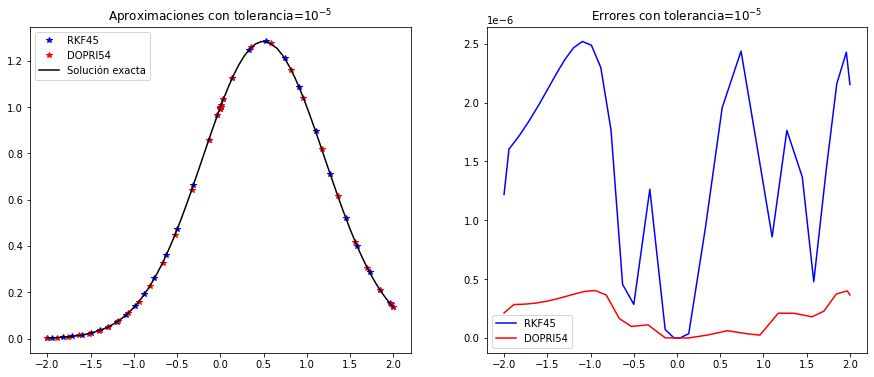

In [39]:
# Gráficas con una tolerancia de 10^(-5)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S5R[:,0],S5R[:,1],'*b',label='RKF45')
plt.plot(S5D[:,0],S5D[:,1],'*r',label='DOPRI54')
plt.plot(S7R[:,0],SolEx7R,'k',label='Solución exacta')
plt.title('Aproximaciones con tolerancia=$10^{-5}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S5R[:,0],E5R,'b',label='RKF45')
plt.plot(S5D[:,0],E5D,'r',label='DOPRI54')
plt.title('Errores con tolerancia=$10^{-5}$')
plt.legend(loc='best')

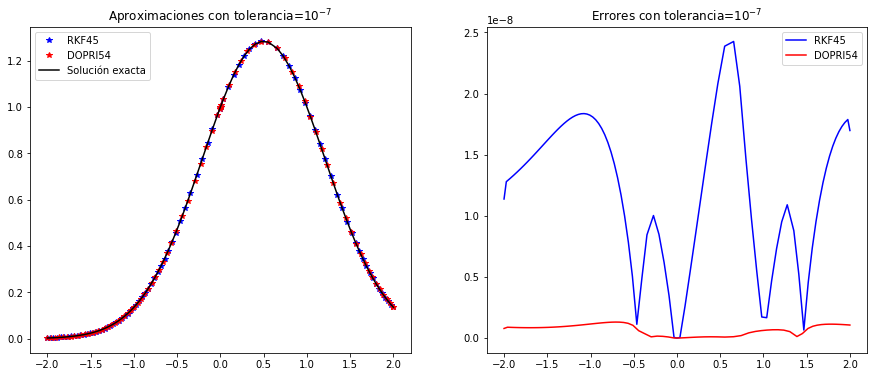

In [40]:
# Gráficas con una tolerancia de 10^(-7)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S7R[:,0],S7R[:,1],'*b',label='RKF45')
plt.plot(S7D[:,0],S7D[:,1],'*r',label='DOPRI54')
plt.plot(S7R[:,0],SolEx7R,'k',label='Solución exacta')
plt.title('Aproximaciones con tolerancia=$10^{-7}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S7R[:,0],E7R,'b',label='RKF45')
plt.plot(S7D[:,0],E7D,'r',label='DOPRI54')
plt.title('Errores con tolerancia=$10^{-7}$')
plt.legend(loc='best')

En este caso, vemos que con ambas tolerancias, se obtienen menores errores para el método DOPRI54 que para el RKF45.

In [42]:
# Método RKF45
S5R = DESOLVE_RK(pvi,rng,metodo="RKF45",tolerancia=5,info=4)
S7R = DESOLVE_RK(pvi,rng,metodo="RKF45",tolerancia=7,info=4)

# Método DOPRI54
S5D = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=5,info=4,fsal="no")
S7D = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=7,info=4,fsal="no")

Número total de pasos: 40 

Número total de pasos: 95 

Número total de pasos: 37 

Número total de pasos: 85 



Para el método RKF45 se dan 40 pasos con tolerancia $10^{-5}$ y 95 pasos con tolerancia $10^{-7}$. Por otro lado, para el método DOPRI54 se dan 37 pasos con tolerancia $10^{-5}$ y 85 pasos con tolerancia $10^{-7}$. Por tanto, con el método DOPRI54 se dan menos pasos, y por tanto el coste computacional es menor para este método.

## Ejercicio 2 (1 punto) <span style='color:Red '> Opcional:</span>
Dado el problema de valor inicial
$$ 
\left\lbrace
\begin{array}{rcl}
     y' &=& -y+(1-\cos(4x)) \\
    y(0) &=& 1
\end{array}
\right.
$$
calcula aplicando el método DOPRI54 aproximaciones de la solución en el intervalo $[-2,0]$ con una tolerancia de $10^{-4}$ y $10^{-6}$.

Sabiendo que la solución exacta para el PVI es
$$y(x) = \frac{1}{17} \left( -4\sin(4x)+e^{-x}-\cos(4x)+17 \right) :$$

1. Analiza el efecto de la tolerancia. Para ello, para cada método, realiza una gráfica donde se representen todas las aproximaciones con las distintas tolerancias y la solución exacta, y otra gráfica donde se representen todos los errores.

2. Analiza el efecto del método con y sin la función fsal. Para ello, para cada valor de la tolerancia, realiza una gráfica donde se representen todas las aproximaciones con ambas opciones y la solución exacta, y otra gráfica donde se representen los errores de ambas opciones. 

3. Haciendo uso de la opción info = 3, analiza cúantas evaluaciones de función se han ahorrado al utilizar la opción fsal.

Comentar **todos** los resultados.

In [85]:
def f2(x,y):
    return -y+(1-np.cos(4*x))

pvi = [f2,[0,1]]
rng = [-2,0]

# Método DOPRI54 con fsal="no"
S4 = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=4,hini=2.5,fsal="no")
S6 = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=6,hini=2.5,fsal="no")

# Método DOPRI54 con fsal="si"
S4fsal = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=4,fsal="si")
S6fsal = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=6,fsal="si")

# Solución exacta
def f2_sol(x):
    return 1/17*(-4*np.sin(4*x) + np.exp(-x) - np.cos(4*x) + 17)

x = np.linspace(-2,0,100)
SolEx = f2_sol(x)

SolEx4 = f2_sol(S4[:,0])
SolEx6 = f2_sol(S6[:,0])
SolEx4fsal = f2_sol(S4fsal[:,0])
SolEx6fsal = f2_sol(S6fsal[:,0])

# Errores
E4 = abs(S4[:,1]-SolEx4)
E6 = abs(S6[:,1]-SolEx6)
E4fsal = abs(S4fsal[:,1]-SolEx4fsal)
E6fsal = abs(S6fsal[:,1]-SolEx6fsal)

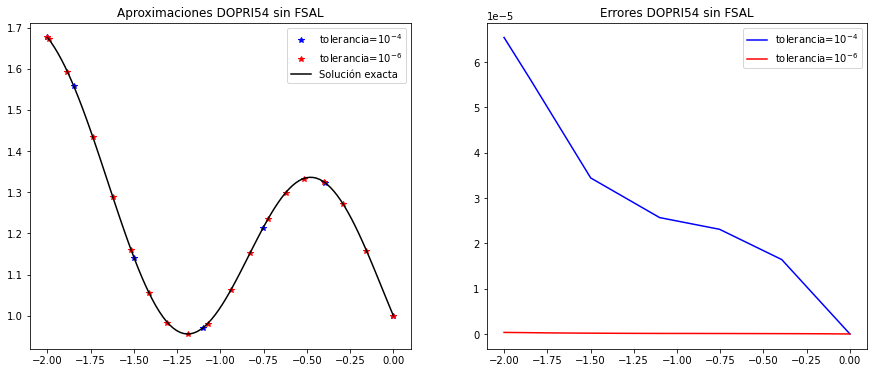

In [86]:
# Gráficas para el método DOPRI54 con fsal="no"

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S4[:,0],S4[:,1],'*b',label='tolerancia=$10^{-4}$')
plt.plot(S6[:,0],S6[:,1],'*r',label='tolerancia=$10^{-6}$')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones DOPRI54 sin FSAL')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S4[:,0],E4,'b',label='tolerancia=$10^{-4}$')
plt.plot(S6[:,0],E6,'r',label='tolerancia=$10^{-6}$')
plt.title('Errores DOPRI54 sin FSAL')
plt.legend(loc='best')

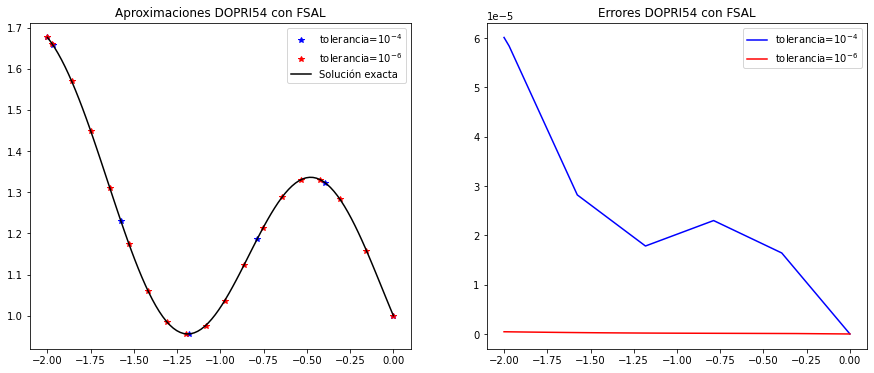

In [87]:
# Gráficas para el método DOPRI54 con fsal="si"

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S4fsal[:,0],S4fsal[:,1],'*b',label='tolerancia=$10^{-4}$')
plt.plot(S6fsal[:,0],S6fsal[:,1],'*r',label='tolerancia=$10^{-6}$')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones DOPRI54 con FSAL')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S4fsal[:,0],E4fsal,'b',label='tolerancia=$10^{-4}$')
plt.plot(S6fsal[:,0],E6fsal,'r',label='tolerancia=$10^{-6}$')
plt.title('Errores DOPRI54 con FSAL')
plt.legend(loc='best')

En ambos casos, al disminuir la tolerancia disminuyen los errores, y por tanto se obtienen mejores aproximaciones. Sin embargo, también aumenta el número de pasos.

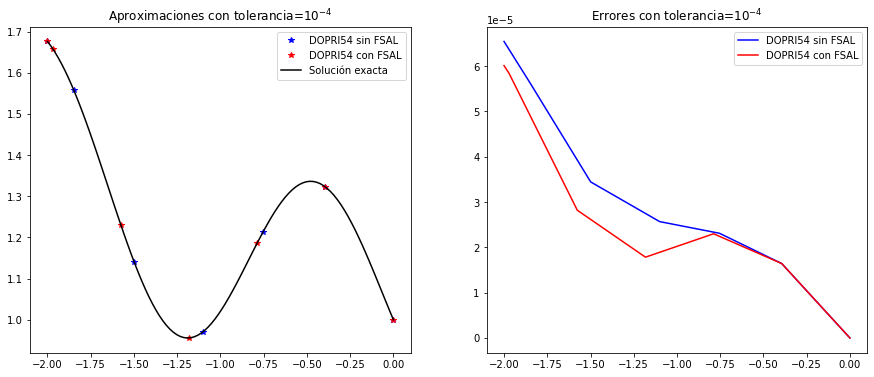

In [88]:
# Gráficas con una tolerancia de 10^(-4)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S4[:,0],S4[:,1],'*b',label='DOPRI54 sin FSAL')
plt.plot(S4fsal[:,0],S4fsal[:,1],'*r',label='DOPRI54 con FSAL')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con tolerancia=$10^{-4}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S4[:,0],E4,'b',label='DOPRI54 sin FSAL')
plt.plot(S4fsal[:,0],E4fsal,'r',label='DOPRI54 con FSAL')
plt.title('Errores con tolerancia=$10^{-4}$')
plt.legend(loc='best')

En el caso con tolerancia de $10^{4}$ se obtienen errores menores para el método DOPRI54 usando FSAL.

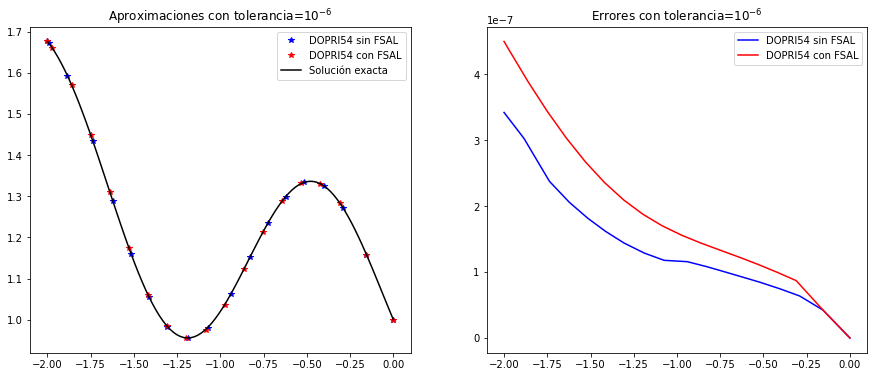

In [89]:
# Gráficas con una tolerancia de 10^(-6)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(S6[:,0],S6[:,1],'*b',label='DOPRI54 sin FSAL')
plt.plot(S6fsal[:,0],S6fsal[:,1],'*r',label='DOPRI54 con FSAL')
plt.plot(x,SolEx,'k',label='Solución exacta')
plt.title('Aproximaciones con tolerancia=$10^{-6}$')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(S6[:,0],E6,'b',label='DOPRI54 sin FSAL')
plt.plot(S6fsal[:,0],E6fsal,'r',label='DOPRI54 con FSAL')
plt.title('Errores con tolerancia=$10^{-6}$')
plt.legend(loc='best')

En este otro caso, con tolerancia de $10^{6}$ se obtienen errores menores sin usar FSAL.

In [91]:
# Método DOPRI54 con fsal="no"
S4 = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=4,hini=2.5,fsal="no",info=3)

# Método DOPRI54 con fsal="si"
S4fsal = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=4,fsal="si",info=3)

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 0.0001 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
---    -2.50000    8.0980979646e-02   --------    ----------------    0.15763
1      -0.39408    3.4595632338e-05    -0.39408    1.3228689763e+00    1.09645
---    -0.43209    1.0410021301e-04   --------    ----------------    0.83249
2      -0.35971    5.8137204129e-05    -0.75379    1.2130467268e+00    0.96301
3      -0.34640    4.7429445940e-06    -1.10020    9.7084727409e-01    1.80190
---    -0.62418    3.0066569191e-04   --------    ----------------    0.63859
4      -0.39860    8.4394436928e-05    -1.49879    1.1401110380e+00    0.87733
5      -0.34970    9.3703330299e-07    -1.84850    1.5583231772e+00    2.70274
---    -0.94515    3.1906974967e-04   --------    ----------------    0.6

Con tolerancia de $10^{4}$, sin usar FSAL se dan 5 pasos intermedios entre pasos, mientras que con FSAL se da solo 1 paso intermedio. Por otro lado, al usar FSAL estamos teniendo en cuenta que la primera etapa de cada paso coincide con la última etapa del paso anterior, de forma que computacionalmente es como si hubiera una etapa menos. De esta forma, como el método DOPRI54 tiene 7 etapas, al usar FSAL solo hacemos 7 evaluaciones de función en el primer paso, pero en los siguientes pasos hacemos 6 evaluaciones por paso. De esta forma, como en este caso tenemos 6 pasos, tenemos que sin FSAL hacemos $6\cdot 7 +1\cdot 7+ 5\cdot 7 = 84$ evaluaciones de función (6 pasos de 7, y además el último paso se calcula 2 veces, primero con $x<a$ y  luego con $x=a$), teniendo en cuenta también los pasos intermedios. Por otro lado, usando FSAL hacemos $1\cdot 7 + 5\cdot 6 + 1\cdot 7 +1 \cdot 7 = 51$ evaluaciones de función (7 en el primer paso, 6 en los siguientes pasos, y además el último paso se calcula 2 veces, la primera usando FSAL y la segunda sin usar FSAL, pues se ajusta $h$ para acabar en $a$, y por tanto esta segunda vez se hacen 7; y por último 7 en el paso intermedio). Por tanto, se ahorran $84-51 = 33$ evaluaciones de función.

In [92]:
# Método DOPRI54 con fsal="no"
S6 = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=6,hini=2.5,fsal="no",info=3)

# Método DOPRI54 con fsal="si"
S6fsal = DESOLVE_RK(pvi,rng,metodo="DOPRI54",tolerancia=6,fsal="si",info=3)

-----------------------------------------------------------------------------
Información de los pasos de la solución numérica con TOL = 1e-06 :
Paso      h             Error            x               y              q
-----------------------------------------------------------------------------
---    -2.50000    8.0980979646e-02   --------    ----------------    0.10000
---    -0.25000    1.0866454582e-06   --------    ----------------    0.82361
---    -0.20590    1.5398901139e-06   --------    ----------------    0.75487
1      -0.15543    8.9658049488e-07    -0.15543    1.1579408630e+00    0.86416
2      -0.13432    2.7512913334e-07    -0.28974    1.2706695168e+00    1.16107
---    -0.15595    1.8224882410e-06   --------    ----------------    0.72373
3      -0.11287    4.5516089132e-07    -0.40261    1.3254241886e+00    1.02377
4      -0.11555    7.2953691674e-07    -0.51816    1.3333397591e+00    0.90987
5      -0.10513    5.6296246278e-07    -0.62329    1.2986959856e+00    0.97

Con tolerancia de $10^{6}$, sin FSAL se dan 6 pasos intermedios, mientras que con FSAL se dan 4. Por el mismo razonamiento que antes, como se dan 18 pasos, tenemos que sin usar FSAL se hacen $18\cdot 7 + 1\cdot 7 + 6\cdot 7 = 175$ evaluaciones de función, mientras que usando FSAL se hacen $1\cdot 7 + 17\cdot 6 + 1\cdot 7 + 4\cdot 7 = 144$ (7 en el primer paso, 6 en los siguientes pasos excepto el último, en el que se hacen primero 6 con $x<a$ y luego 7 con $x=a$, y 7 en los pasos intermedios), luego nos ahorramos $175-144= 31$ evaluaciones de función.